<a href="https://colab.research.google.com/github/CristianCosci/BorutaPy_Feature_Selection_BTC_dataset/blob/main/featureSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!pip install Boruta

In [28]:
from google.colab import drive
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from boruta import BorutaPy
from sklearn import preprocessing
from sklearn import utils
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.feature_selection import f_regression, mutual_info_regression
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

connected = False

In [ ]:
if(not connected):
  drive.mount('/content/gdrive')
  path = F"/content/gdrive/My Drive/TESI/dataset/"
  connected = True

BTC_daily_glassnode = pd.read_csv(path + "BTC_daily_glassnode_dataset.csv")
BTC_daily_glassnode = BTC_daily_glassnode.dropna()

features = [f for f in BTC_daily_glassnode.columns if f not in ['open','high', 'close', 'low', 'datetime']]
print('numero di features da analizzare:',len(features))
print('FEATURES : ',features)
X = BTC_daily_glassnode[features].values
y = BTC_daily_glassnode['close'].values.ravel()

In [30]:
#USING BORUTA
rf_1 = RandomForestRegressor(n_jobs=-1, oob_score= True)
feat_selector = BorutaPy(rf_1, n_estimators = 'auto', max_iter= 100)
feat_selector.fit(X, y)

selected_features = [features[i] for i, x in enumerate(feat_selector.support_) if x]
print('feature selezionate: ', selected_features)

# zip my names, ranks, and decisions in a single iterable
feature_ranks = list(zip(features, feat_selector.ranking_, feat_selector.support_))
for feat in feature_ranks:
    print('Feature: {:<25} Rank: {},  Keep: {}'.format(feat[0], feat[1], feat[2]))
  
selected_features = [features[i] for i, x in enumerate(feat_selector.support_) if x]
print('feature selezionate (zona verde): ', selected_features)
print()
nonselected_features = [features[i] for i, x in enumerate(feat_selector.support_weak_) if x]
print('feature in zona blu, non selezionate ma indecisione: ', nonselected_features)

print("Ranking: ",feat_selector.ranking_)          
print("No. of significant features: ", feat_selector.n_features_)

feature selezionate:  ['total_unique_addresses', 'mean_transaction_fees', 'market_cap', 'reserve_risk', 'stock_to_flow', 'stock_to_fow_deflection', 'realized_loss', 'cvdd', 'addresses>1']
Feature: volume                    Rank: 3,  Keep: False
Feature: new_addresses             Rank: 13,  Keep: False
Feature: active_addresses          Rank: 11,  Keep: False
Feature: total_unique_addresses    Rank: 1,  Keep: True
Feature: sending_addresses         Rank: 16,  Keep: False
Feature: receiving_addresses       Rank: 9,  Keep: False
Feature: total_fees                Rank: 5,  Keep: False
Feature: mean_transaction_fees     Rank: 1,  Keep: True
Feature: number_of_transaction     Rank: 15,  Keep: False
Feature: transaction_rate          Rank: 16,  Keep: False
Feature: market_cap                Rank: 1,  Keep: True
Feature: total_transaction_size    Rank: 13,  Keep: False
Feature: mean_transaction_size     Rank: 12,  Keep: False
Feature: hash_rate                 Rank: 4,  Keep: False
Feature: m

Feature 0: 1.239595
Feature 1: 1860.627170
Feature 2: 2528.678072
Feature 3: 3492.614590
Feature 4: 2005.735272
Feature 5: 1972.924251
Feature 6: 113.588622
Feature 7: 0.694915
Feature 8: 732.119322
Feature 9: 732.119322
Feature 10: 2098438.033317
Feature 11: 1508.311376
Feature 12: 432.881570
Feature 13: 4762.766111
Feature 14: 4840.363778
Feature 15: 24.676821
Feature 16: 20298.884870
Feature 17: 137.028055
Feature 18: 4408.221029
Feature 19: 933.222084
Feature 20: 8467.819030
Feature 21: 2302.902027
Feature 22: 1581.667331
Feature 23: 2664.955189
Feature 24: 1638.646941


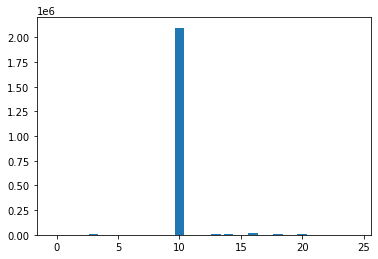

In [31]:
#USING F REGRESSION
fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X, y)
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

Feature 0: 0.305496
Feature 1: 1.157828
Feature 2: 1.349935
Feature 3: 3.541092
Feature 4: 1.213685
Feature 5: 1.232701
Feature 6: 0.774767
Feature 7: 0.946959
Feature 8: 0.931198
Feature 9: 0.931209
Feature 10: 3.764066
Feature 11: 1.048906
Feature 12: 0.287459
Feature 13: 2.073992
Feature 14: 2.829322
Feature 15: 1.845174
Feature 16: 3.082867
Feature 17: 1.807146
Feature 18: 1.021355
Feature 19: 0.856085
Feature 20: 3.363350
Feature 21: 2.872152
Feature 22: 2.693414
Feature 23: 1.361069
Feature 24: 1.421022


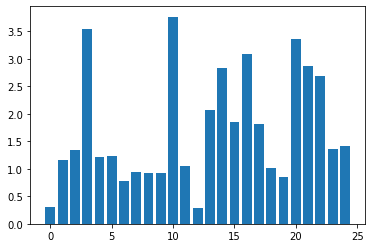

In [32]:
#USING MUTUAL INFO REGRESSION
fs = SelectKBest(score_func=mutual_info_regression, k='all')
fs.fit(X, y)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

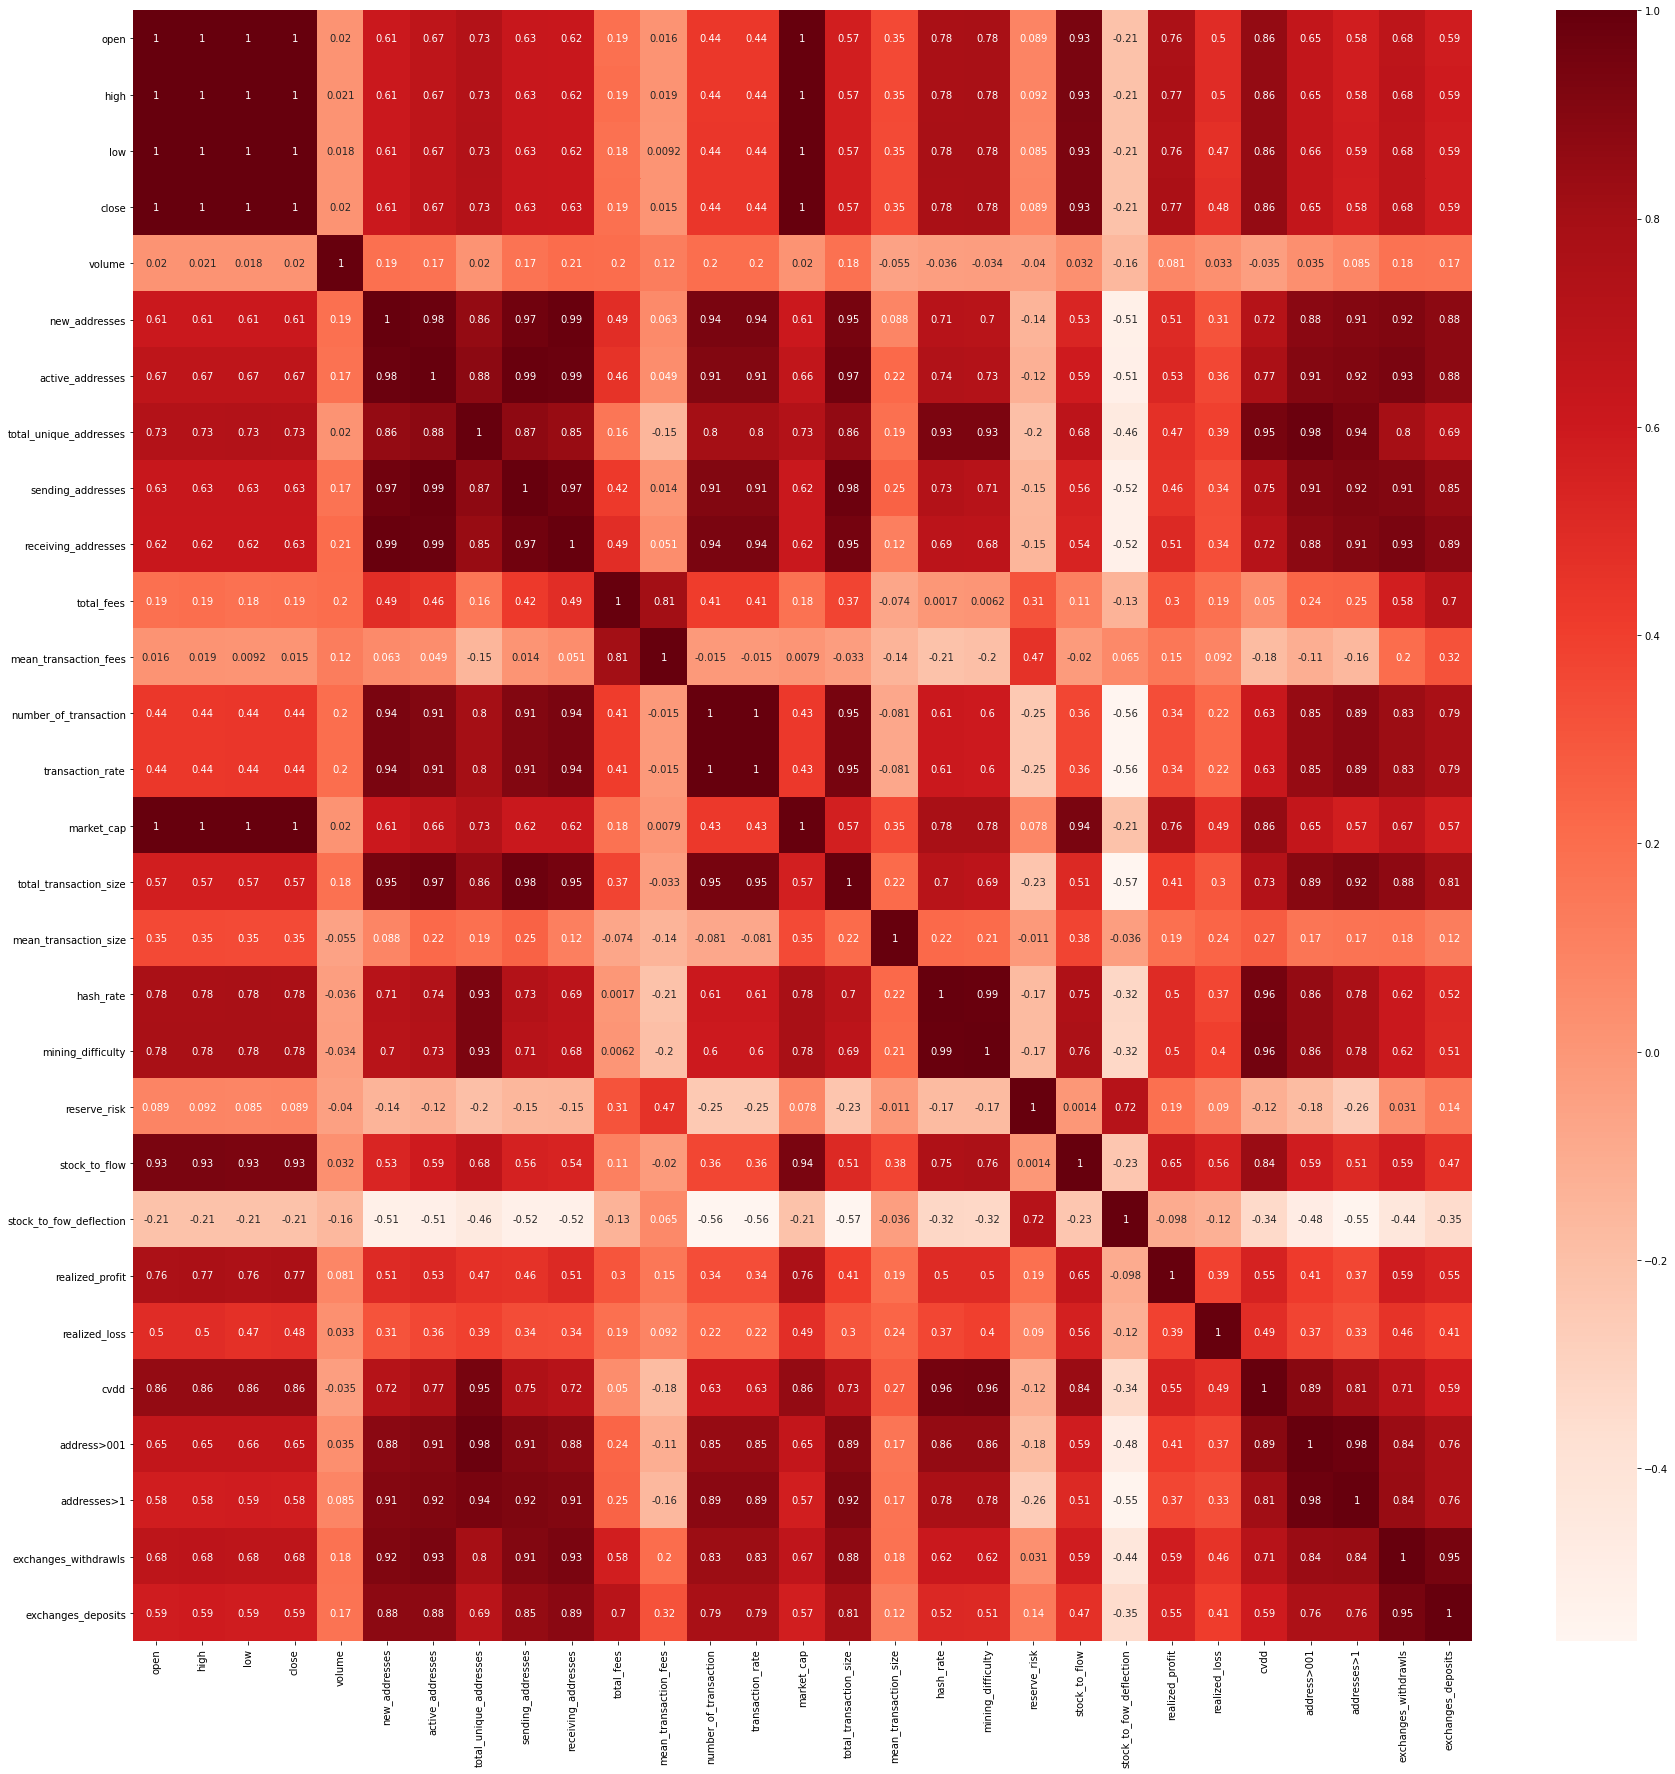

open                      0.998733
high                      0.999451
low                       0.999351
close                     1.000000
new_addresses             0.614048
active_addresses          0.671814
total_unique_addresses    0.729297
sending_addresses         0.628371
receiving_addresses       0.625233
market_cap                0.999268
total_transaction_size    0.573724
hash_rate                 0.779581
mining_difficulty         0.782044
stock_to_flow             0.931923
realized_profit           0.767567
cvdd                      0.856542
address>001               0.654443
addresses>1               0.582863
exchanges_withdrawls      0.681441
exchanges_deposits        0.589672
Name: close, dtype: float64

In [33]:
#USING PEARSON CORRELATION
plt.figure(figsize=(30,30))
cor = BTC_daily_glassnode.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

#Correlation with output variable
cor_target = abs(cor["close"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features